---
### Data Exploration

Aqui serão importados os datasets obtidos no Yahoo Finance, para esta PoC vamos utilizar os dados das empresas Petrobras(PETR4), Magazine Luiza(MGLU3), Itau(ITUB4), Cemig(CMIG4) e iBovespa(BVSP).

---


In [19]:
# Importe as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd

# Exibição amigável para notebooks
%matplotlib inline

# Importa biblioteca do projeto
import stock_market_predictor as smp


In [20]:
# Carregando os dados de negociacao
PETR4 = pd.read_csv("files\PETR4.SA.csv")
MGLU3 = pd.read_csv("files\MGLU3.SA.csv")
ITUB4 = pd.read_csv("files\ITUB4.SA.csv")
CMIG4 = pd.read_csv("files\CMIG4.SA.csv")

BVSP = pd.read_csv("files\BVSP.csv", usecols=["Date", "Adj Close"])
BVSP.columns = ['Date', 'Adj_Close_IBOV']

# Sucesso - Exibindo o primeiro registro
display(BVSP.head(n=5))

,Date,Adj_Close_IBOV
0,2011-06-01,63411.0
1,2011-06-02,64218.0
2,2011-06-03,64341.0
3,2011-06-06,63068.0
4,2011-06-07,63218.0


In [21]:
# Indice bovespa
# Verificando integridade do dataset
display(len(BVSP))
display(BVSP.describe())
display(BVSP[BVSP.Adj_Close_IBOV.isna()])

1986

,Adj_Close_IBOV
count,1980.000000
mean,61464.752525
std,13456.607131
min,37497.000000
25%,52257.250000
50%,57532.000000
75%,66034.750000
max,99994.000000


,Date,Adj_Close_IBOV
1495,2017-06-15,NaN
1555,2017-09-07,NaN
1580,2017-10-12,NaN
1595,2017-11-02,NaN
1607,2017-11-20,NaN
1632,2017-12-25,NaN


In [22]:
# Após verificar que todas as datas com dados NaN são feriados
BVSP = BVSP.dropna()

display(len(BVSP))
display(BVSP.describe())
display(BVSP[BVSP.Adj_Close_IBOV.isna()])

1980

,Adj_Close_IBOV
count,1980.000000
mean,61464.752525
std,13456.607131
min,37497.000000
25%,52257.250000
50%,57532.000000
75%,66034.750000
max,99994.000000


,Date,Adj_Close_IBOV


In [23]:
# Verificando dataset das ações selecionadas
# espera-se que tenham o mesmo numero de registro do indice iBovespa

# Indice PETR4
display("PETR4")
display("Numero de registros: {}".format(len(PETR4)))
display(PETR4.describe())
display(PETR4[PETR4.Open.isna()])

# Indice MGLU3
display("MGLU3")
display("Numero de registros: {}".format(len(MGLU3)))
display(MGLU3.describe())
display(MGLU3[MGLU3.Open.isna()])

# Indice ITUB4
display("ITUB4")
display("Numero de registros: {}".format(len(ITUB4)))
display(ITUB4.describe())
display(ITUB4[ITUB4.Open.isna()])

# Indice CMIG4
display("CMIG4")
display("Numero de registros: {}".format(len(CMIG4)))
display(CMIG4.describe())
display(CMIG4[CMIG4.Open.isna()])

'PETR4'

'Numero de registros: 1986'

,Open,High,Low,Close,Adj Close,Volume
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1.957000e+03
mean,16.966725,17.228723,16.685948,16.942938,15.754821,4.491398e+07
std,5.397946,5.440303,5.351579,5.396971,5.030811,3.177863e+07
min,4.200000,4.270000,4.120000,4.200000,4.008060,0.000000e+00
25%,13.300000,13.590000,13.070000,13.290000,12.565537,2.540160e+07
50%,17.350000,17.660000,17.049999,17.299999,15.894867,3.870030e+07
75%,20.670000,21.080000,20.400000,20.670000,18.848883,5.649520e+07
max,29.549999,29.600000,28.980000,29.250000,29.119148,6.989506e+08


,Date,Open,High,Low,Close,Adj Close,Volume
41,2011-07-29,NaN,NaN,NaN,NaN,NaN,NaN
42,2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN
43,2011-08-02,NaN,NaN,NaN,NaN,NaN,NaN
44,2011-08-03,NaN,NaN,NaN,NaN,NaN,NaN
45,2011-08-04,NaN,NaN,NaN,NaN,NaN,NaN
46,2011-08-05,NaN,NaN,NaN,NaN,NaN,NaN
47,2011-08-08,NaN,NaN,NaN,NaN,NaN,NaN
48,2011-08-09,NaN,NaN,NaN,NaN,NaN,NaN
49,2011-08-10,NaN,NaN,NaN,NaN,NaN,NaN
50,2011-08-11,NaN,NaN,NaN,NaN,NaN,NaN


'MGLU3'

'Numero de registros: 1986'

,Open,High,Low,Close,Adj Close,Volume
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1.984000e+03
mean,35.231942,35.900273,34.496274,35.218742,34.533849,1.073984e+06
std,51.197314,52.076922,50.233184,51.176321,51.221975,9.941021e+05
min,1.006250,1.016250,0.972500,0.978750,0.929990,0.000000e+00
25%,7.265000,7.420000,7.070000,7.260000,6.596992,4.976000e+05
50%,10.245000,10.395000,10.055000,10.250000,9.238980,8.223000e+05
75%,31.780350,32.281250,31.045626,31.895925,31.531774,1.320400e+06
max,201.500000,202.309998,194.029999,200.210007,200.210007,1.345200e+07


,Date,Open,High,Low,Close,Adj Close,Volume
470,2013-04-26,NaN,NaN,NaN,NaN,NaN,NaN
532,2013-07-26,NaN,NaN,NaN,NaN,NaN,NaN


'ITUB4'

'Numero de registros: 1986'

,Open,High,Low,Close,Adj Close,Volume
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03
mean,21.054180,21.312049,20.786681,21.056764,18.428764,2.096257e+07
std,6.781908,6.842289,6.713225,6.780911,7.805462,9.964087e+06
min,11.884400,12.066600,11.451900,11.634000,8.761898,0.000000e+00
25%,15.758950,15.935975,15.581050,15.757600,12.170242,1.445744e+07
50%,18.782100,19.008301,18.516550,18.753549,15.363676,1.925185e+07
75%,25.900000,26.171700,25.556651,25.854975,24.306655,2.496592e+07
max,38.669998,39.790001,38.400002,39.689999,38.822781,1.049172e+08


,Date,Open,High,Low,Close,Adj Close,Volume
101,2011-10-25,NaN,NaN,NaN,NaN,NaN,NaN
102,2011-10-26,NaN,NaN,NaN,NaN,NaN,NaN
103,2011-10-27,NaN,NaN,NaN,NaN,NaN,NaN
112,2011-11-10,NaN,NaN,NaN,NaN,NaN,NaN
133,2011-12-12,NaN,NaN,NaN,NaN,NaN,NaN
158,2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN
176,2012-02-13,NaN,NaN,NaN,NaN,NaN,NaN
198,2012-03-19,NaN,NaN,NaN,NaN,NaN,NaN
214,2012-04-11,NaN,NaN,NaN,NaN,NaN,NaN
238,2012-05-16,NaN,NaN,NaN,NaN,NaN,NaN


'CMIG4'

'Numero de registros: 1986'

,Open,High,Low,Close,Adj Close,Volume
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03
mean,12.472919,12.674019,12.265903,12.463493,9.139365,6.634825e+06
std,4.853325,4.899579,4.811330,4.863063,2.708390,5.565520e+06
min,4.119830,4.216770,3.974430,4.158610,3.287066,0.000000e+00
25%,8.077435,8.250000,7.950000,8.092130,7.202775,3.372669e+06
50%,13.028400,13.231900,12.756900,12.941100,9.040359,5.167363e+06
75%,15.380750,15.593900,15.152650,15.356200,10.464186,8.189650e+06
max,26.329100,26.484900,26.145300,26.296301,16.020597,8.900079e+07


,Date,Open,High,Low,Close,Adj Close,Volume
112,2011-11-10,NaN,NaN,NaN,NaN,NaN,NaN
133,2011-12-12,NaN,NaN,NaN,NaN,NaN,NaN
158,2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN


---
### Problemas com dataset

Após análise dos datasets do Yahoo Finance, foram identificadas ausências de dados. Temos 3 alternativas para contornar este tipo de problema: 
1. Gerar os dados ausentes, técnica comum quando se trata de dados de operações, já que 
    algumas vezes os dados simplesmente não existem (sem operações naquele dia) 
2. Trocar fornecedor do dataset
3. Reduzir o alcance do dataset, uma vez que os problemas se encontram nos três primeiros anos
    
Embora tenha considerado gerar os dados, não considerei uma boa alternativa, uma vez que as informações existem, apenas não as tenho neste dataset. A troca de fornecedor não foi possível pois as alternativas ou eram pagas ou não forneciam o layout para interpretar o arquivo. Por fim optei por reduzir a massa de dados de 8 anos para 5 anos, pois embora alguns dados estejam faltando, foi verificado (por amostragem) que os dados presentes estão corretos, portanto, continuaremos por utilizar os datasets do Yahoo Finance, restringindo os dados ao intervalo 01/01/2014 a 01/06/2019.

Fornecedores alternativos de dados avaliados:

https://br.advfn.com/bolsa-de-valores/bovespa/petrobras-PETR4/historico/mais-dados-historicos

http://www.bmfbovespa.com.br/en_us/services/market-data/historical-data/equities/historical-data/

---


In [24]:
# Carregando os dados de negociação com intervalo de tempo mais restrito
PETR4 = pd.read_csv("files_v2\PETR4.SA.csv")
MGLU3 = pd.read_csv("files_v2\MGLU3.SA.csv")
ITUB4 = pd.read_csv("files_v2\ITUB4.SA.csv")
CMIG4 = pd.read_csv("files_v2\CMIG4.SA.csv")

PETR4["Predict"] = np.NaN
MGLU3["Predict"] = np.NaN
ITUB4["Predict"] = np.NaN
CMIG4["Predict"] = np.NaN

BVSP = pd.read_csv("files_v2\BVSP.csv", usecols=["Date", "Adj Close"])
BVSP.columns = ['Date', 'Adj_Close_IBOV']

display(BVSP.head(n=5))

,Date,Adj_Close_IBOV
0,2014-01-02,50341.0
1,2014-01-03,50981.0
2,2014-01-06,50974.0
3,2014-01-07,50430.0
4,2014-01-08,50577.0


In [25]:
# Indice bovespa
# Verificando integridade do dataset
display(len(BVSP))
display(BVSP.describe())
display(BVSP[BVSP.Adj_Close_IBOV.isna()])

# Após verificar que todas as datas com dados NaN são feriados
# vamos apagar as linhas
BVSP = BVSP.dropna()

display(len(BVSP))
display(BVSP.describe())
display(BVSP[BVSP.Adj_Close_IBOV.isna()])

1346

,Adj_Close_IBOV
count,1340.000000
mean,63712.668657
std,15547.130567
min,37497.000000
25%,51181.750000
50%,59046.500000
75%,75974.500000
max,99994.000000


,Date,Adj_Close_IBOV
855,2017-06-15,NaN
915,2017-09-07,NaN
940,2017-10-12,NaN
955,2017-11-02,NaN
967,2017-11-20,NaN
992,2017-12-25,NaN


1340

,Adj_Close_IBOV
count,1340.000000
mean,63712.668657
std,15547.130567
min,37497.000000
25%,51181.750000
50%,59046.500000
75%,75974.500000
max,99994.000000


,Date,Adj_Close_IBOV


In [26]:
# Verificando dataset das acoes selecionadas
# espera-se que tenham o mesmo numero de registro do indice iBovespa

# Indice PETR4
display("PETR4")
display("Numero de registros: {}".format(len(PETR4)))
display(PETR4.describe())
display(PETR4[PETR4.Open.isna()])
display(PETR4.head(10))

# Indice MGLU3
display("MGLU3")
display("Numero de registros: {}".format(len(MGLU3)))
display(MGLU3.describe())
display(MGLU3[MGLU3.Open.isna()])
display(MGLU3.head(10))

# Indice ITUB4
display("ITUB4")
display("Numero de registros: {}".format(len(ITUB4)))
display(ITUB4.describe())
display(ITUB4[ITUB4.Open.isna()])
display(ITUB4.head(10))

# Indice CMIG4
display("CMIG4")
display("Numero de registros: {}".format(len(CMIG4)))
display(CMIG4.describe())
display(CMIG4[CMIG4.Open.isna()])
display(CMIG4.head(10))

'PETR4'

'Numero de registros: 1346'

,Open,High,Low,Close,Adj Close,Volume,Predict
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03,0.0
mean,15.511790,15.772578,15.228886,15.487377,14.835341,5.380301e+07,NaN
std,5.761383,5.818011,5.695014,5.757601,5.687416,3.409196e+07,NaN
min,4.200000,4.270000,4.120000,4.200000,4.008060,0.000000e+00,NaN
25%,11.645000,11.940000,11.395000,11.595000,11.065109,3.596380e+07,NaN
50%,15.050000,15.255000,14.775000,15.020000,14.146190,4.795960e+07,NaN
75%,19.030001,19.437501,18.647500,19.049999,18.216541,6.530400e+07,NaN
max,29.549999,29.600000,28.980000,29.250000,29.119148,6.989506e+08,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Predict


,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,2014-01-02,17.150000,17.200001,16.650000,16.750000,14.990937,17284800,NaN
1,2014-01-03,16.740000,16.780001,16.410000,16.500000,14.767193,17837600,NaN
2,2014-01-06,16.450001,16.639999,16.160000,16.620001,14.874590,20526500,NaN
3,2014-01-07,16.650000,16.830000,16.120001,16.160000,14.462897,19052500,NaN
4,2014-01-08,16.270000,16.389999,16.139999,16.190001,14.489747,15874600,NaN
5,2014-01-09,16.190001,16.290001,15.650000,15.700000,14.051208,25871700,NaN
6,2014-01-10,15.760000,16.299999,15.660000,15.970000,14.292852,30221300,NaN
7,2014-01-13,16.010000,16.110001,15.640000,15.770000,14.113856,21660900,NaN
8,2014-01-14,15.710000,15.870000,15.620000,15.700000,14.051208,16339200,NaN
9,2014-01-15,15.790000,16.150000,15.690000,16.040001,14.355501,25748600,NaN


'MGLU3'

'Numero de registros: 1346'

,Open,High,Low,Close,Adj Close,Volume,Predict
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03,0.0
mean,46.972052,47.863819,45.999954,46.961683,46.458773,1.264631e+06,NaN
std,58.586739,59.580154,57.492897,58.557629,58.507392,1.076972e+06,NaN
min,1.006250,1.016250,0.972500,0.978750,0.929990,0.000000e+00,NaN
25%,5.432500,5.530000,5.331563,5.457813,5.112449,6.323250e+05,NaN
50%,9.347500,9.510000,9.190625,9.396250,8.657102,1.002350e+06,NaN
75%,80.190000,81.327501,78.220000,79.600003,78.843594,1.588800e+06,NaN
max,201.500000,202.309998,194.029999,200.210007,200.210007,1.345200e+07,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Predict


,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,2014-01-02,7.61,7.82,6.95,7.23,6.493703,1278000,NaN
1,2014-01-03,7.30,7.49,7.07,7.47,6.709262,802700,NaN
2,2014-01-06,7.50,7.90,7.49,7.86,7.059545,599700,NaN
3,2014-01-07,7.90,8.27,7.90,8.06,7.239178,1253800,NaN
4,2014-01-08,8.04,8.24,8.01,8.22,7.382883,791000,NaN
5,2014-01-09,8.18,8.47,8.03,8.18,7.346957,1361800,NaN
6,2014-01-10,8.26,8.37,8.08,8.15,7.320010,1043200,NaN
7,2014-01-13,8.21,8.26,8.03,8.20,7.364920,648700,NaN
8,2014-01-14,8.16,8.33,8.07,8.25,7.409827,541800,NaN
9,2014-01-15,8.25,8.40,8.15,8.28,7.436772,502900,NaN


'ITUB4'

'Numero de registros: 1346'

,Open,High,Low,Close,Adj Close,Volume,Predict
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03,0.0
mean,23.844238,24.136444,23.543804,23.848154,21.648878,2.131190e+07,NaN
std,6.451740,6.498018,6.390460,6.448333,7.448673,1.071897e+07,NaN
min,13.939400,14.072700,13.824200,13.981800,11.328492,0.000000e+00,NaN
25%,18.622601,18.863501,18.327150,18.636700,15.219756,1.417875e+07,NaN
50%,21.890349,22.161800,21.595000,21.941849,19.328842,1.957178e+07,NaN
75%,28.649974,28.921650,28.378350,28.653299,27.662328,2.564778e+07,NaN
max,38.669998,39.790001,38.400002,39.689999,38.822781,1.049172e+08,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Predict


,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,2014-01-02,15.7977,15.8978,15.6223,15.7876,12.203424,25333788,NaN
1,2014-01-03,15.7776,15.9179,15.6824,15.7576,12.180233,40048592,NaN
2,2014-01-06,15.7175,15.8778,15.6824,15.7826,12.199555,25543620,NaN
3,2014-01-07,15.7676,15.9429,15.6073,15.6624,12.106647,25317617,NaN
4,2014-01-08,15.7025,15.9078,15.7025,15.9078,12.296332,21595142,NaN
5,2014-01-09,15.8027,15.8227,15.4019,15.4120,11.913091,30000607,NaN
6,2014-01-10,15.4671,15.6574,15.3769,15.4871,11.971141,21302855,NaN
7,2014-01-13,15.4821,15.6223,15.4170,15.4170,11.916957,20059434,NaN
8,2014-01-14,15.4170,15.7125,15.3669,15.6474,12.095052,25900794,NaN
9,2014-01-15,15.7776,15.7776,15.6073,15.6524,12.098917,20847453,NaN


'CMIG4'

'Numero de registros: 1346'

,Open,High,Low,Close,Adj Close,Volume,Predict
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1.346000e+03,0.0
mean,10.174450,10.361321,9.983921,10.161932,8.426515,7.777851e+06,NaN
std,3.437383,3.484413,3.401986,3.444254,2.659457,5.954937e+06,NaN
min,4.119830,4.216770,3.974430,4.158610,3.287066,0.000000e+00,NaN
25%,7.450000,7.580122,7.260150,7.418122,6.585513,4.243156e+06,NaN
50%,8.714660,8.860070,8.549870,8.675890,7.671494,6.456506e+06,NaN
75%,13.131250,13.330000,12.902400,13.086500,10.138369,9.583208e+06,NaN
max,19.271099,19.387400,19.106300,19.348700,14.760000,8.900079e+07,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Predict


,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,2014-01-02,13.5712,13.6585,13.2610,13.3483,9.237616,3270981,NaN
1,2014-01-03,13.5421,13.7651,13.4064,13.7651,9.526058,8036331,NaN
2,2014-01-06,13.7554,13.8426,13.5131,13.8426,9.579693,12646529,NaN
3,2014-01-07,13.7069,13.8136,13.3483,13.3773,9.257684,4669618,NaN
4,2014-01-08,13.3967,13.4258,13.1835,13.1932,9.130278,3610995,NaN
5,2014-01-09,13.2126,13.2319,12.7666,12.9024,8.929032,4574195,NaN
6,2014-01-10,12.9217,13.2804,12.8054,13.2029,9.136992,5249168,NaN
7,2014-01-13,13.2513,13.2804,12.8248,12.8248,8.875330,3734168,NaN
8,2014-01-14,12.8248,13.1156,12.8054,13.0284,9.016230,5052546,NaN
9,2014-01-15,13.1544,13.1835,12.8830,12.8927,8.922318,2776641,NaN


---
### Pré-processamento

Segue as etapas do pré-processamento:

1. Preenchimento da coluna 'Predict';
2. Verificar necessidade de transformação logaritmica;
3. Aplicar transformação logaritmica;
4. Aplicar normalização nos dados numericos;
5. Separar dados de treinamento e teste;

---


'| Percentual de altas: 53.00 | Total dias: 1341 | Altas: 723 | '

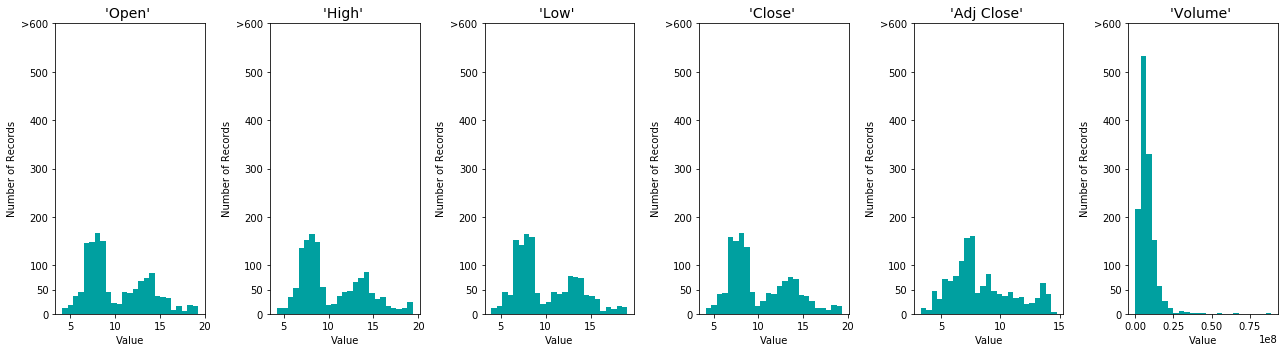

In [27]:
# verificando distribuição dos valores
# MGLU3

dataset_verificacao = MGLU3
smp.pre_processing_target_column(dataset_verificacao, 5)

altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1])
p_altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1]) * 100 / len(dataset_verificacao)
total_dias = len(dataset_verificacao[pd.notnull(dataset_verificacao.Predict)])

display("| Percentual de altas: {:.2f} | Total dias: {} | Altas: {} | ".format(p_altas, total_dias, altas))

smp.pre_processing_verify_log_transformed(CMIG4)

'| Percentual de altas: 51.00 | Total dias: 1341 | Altas: 689 | '

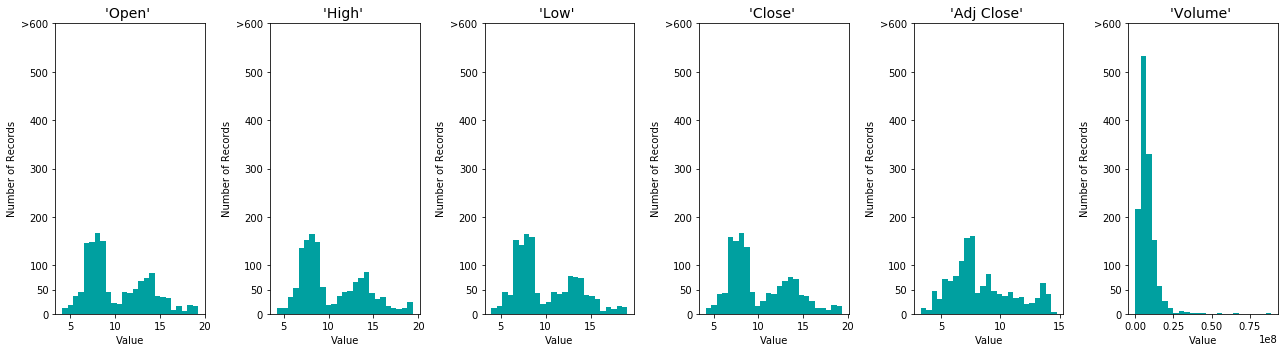

In [28]:
# verificando distribuição dos valores
# CMIG4

dataset_verificacao = CMIG4
smp.pre_processing_target_column(dataset_verificacao, 5)

altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1])
p_altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1]) * 100 / len(dataset_verificacao)
total_dias = len(dataset_verificacao[pd.notnull(dataset_verificacao.Predict)])

display("| Percentual de altas: {:.2f} | Total dias: {} | Altas: {} | ".format(p_altas, total_dias, altas))

smp.pre_processing_verify_log_transformed(CMIG4)

'| Percentual de altas: 53.00 | Total dias: 1341 | Altas: 716 | '

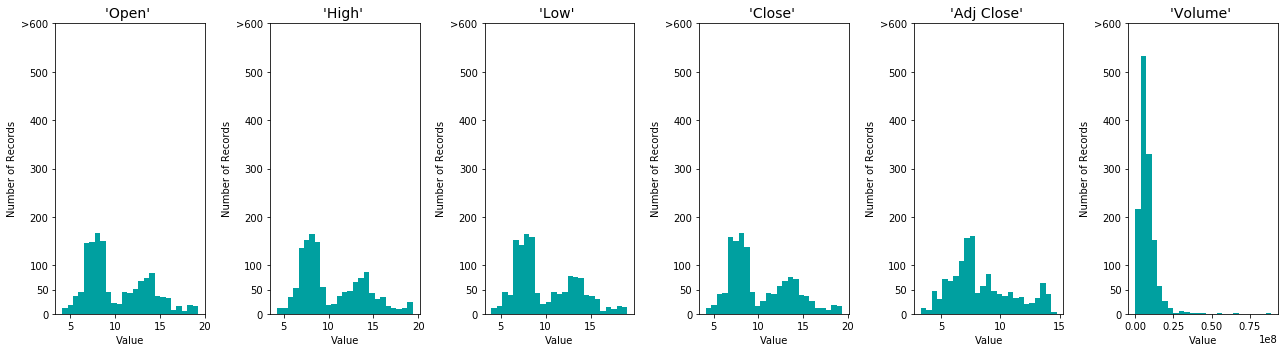

In [29]:
# verificando distribuição dos valores
# ITUB4

dataset_verificacao = ITUB4
smp.pre_processing_target_column(dataset_verificacao, 5)

altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1])
p_altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1]) * 100 / len(dataset_verificacao)
total_dias = len(dataset_verificacao[pd.notnull(dataset_verificacao.Predict)])

display("| Percentual de altas: {:.2f} | Total dias: {} | Altas: {} | ".format(p_altas, total_dias, altas))

smp.pre_processing_verify_log_transformed(CMIG4)

'| Percentual de altas: 53.00 | Total dias: 1341 | Altas: 722 | '

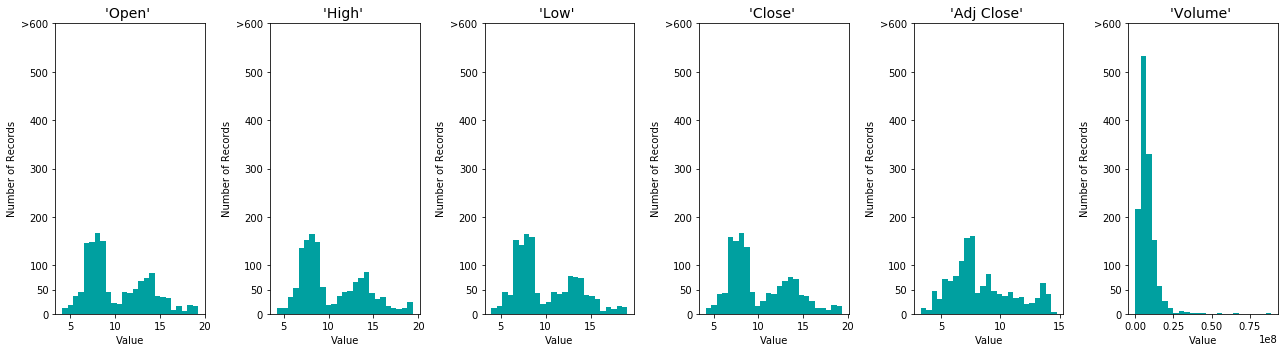

In [30]:
# verificando distribuição dos valores
# PETR4

dataset_verificacao = PETR4
smp.pre_processing_target_column(dataset_verificacao, 5)

altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1])
p_altas = len(dataset_verificacao.loc[dataset_verificacao.Predict == 1]) * 100 / len(dataset_verificacao)
total_dias = len(dataset_verificacao[pd.notnull(dataset_verificacao.Predict)])

display("| Percentual de altas: {:.2f} | Total dias: {} | Altas: {} | ".format(p_altas, total_dias, altas))

smp.pre_processing_verify_log_transformed(CMIG4)

In [31]:
# chama a funcao que encapsula todo o pre-processamento

# 1. preenche coluna 'predict'
# 2. aplica transformacao logaritmica
# 3. aplica normalizacao min max
# 4. define as colunas de target e indice
# 4. divide os dados entre conjuntos de treino e teste

X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        MGLU3
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')

# Show the results of the split
display("Training set has {} samples.".format(X_train.shape[0]))
display("Testing set has {} samples.".format(X_test.shape[0]))

'Training set has 1005 samples.'

'Testing set has 336 samples.'

---
### Aplicando e validando modelos

Modelos selecionados para o teste:

- KNeighborsClassifier
- LinearRegression
- AdaBoostClassifier

---


KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


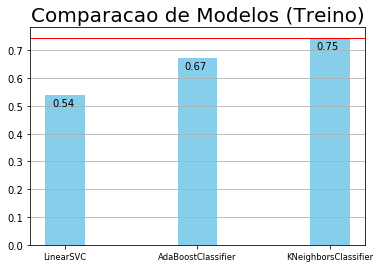

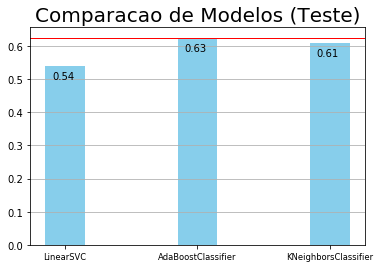

In [32]:
# comparando modelos
# MGLU3

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        MGLU3
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)

KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


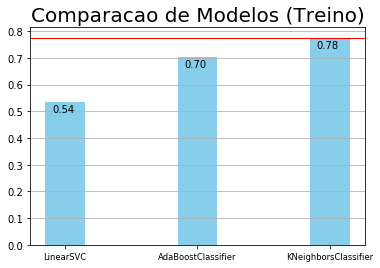

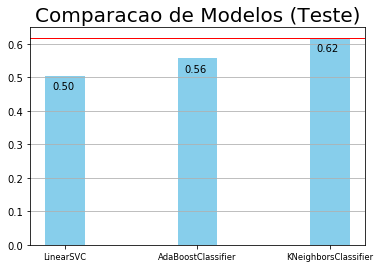

In [33]:
# comparando modelos
# CMIG4

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        CMIG4
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)

KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


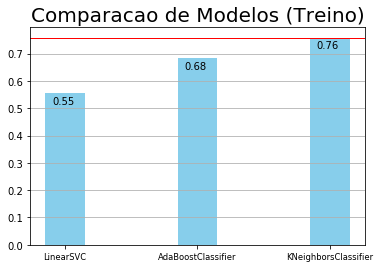

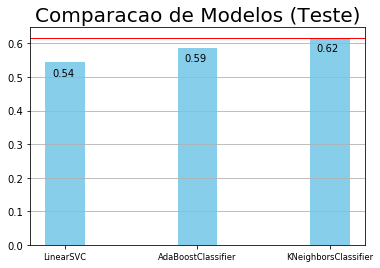

In [34]:
# comparando modelos
# ITUB4

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        ITUB4
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)

KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


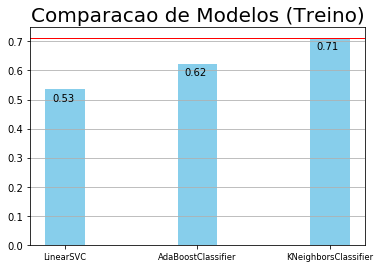

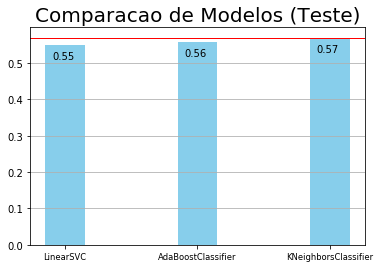

In [35]:
# comparando modelos
# PETR4

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        PETR4
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)

---
### Tuning do modelo

Executando GridSearchCV para fazer o tuning do KNeighborsClassifier

---


In [36]:
# PETR4

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        PETR4
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
                                        ,'Predict', 'Date')


from sklearn.neighbors import KNeighborsClassifier
# default
# leaf_size = 30
# n_neighbors = 5
# p = 2

clf = KNeighborsClassifier()
parameters = {'leaf_size': range(1, 60, 2), 'n_neighbors': range(1, 10), 'p': [1, 2]}

best_clf_params = smp.tuning_valuation(clf, parameters, X_train, y_train, X_test, y_test, True)


Otimização
-------------------------------------------------
ANTES
Precisao dos dados de teste: 0.5693

DEPOIS
Precisao dos dados de teste: 0.5808


---
### Importancia dos atributos

In [37]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_

# Plotar
display(importances)
display(X_train.columns.values)
#vs.feature_plot(importances, X_train, y_train)


array([0.1 , 0.16, 0.26, 0.1 , 0.24, 0.14])

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

---
###  Lógica Naive Predictor

O Naive Predictor sempre segue tendencia: se tivemos uma alta de ontem para hoje, teremos alta amanhã:

> Se D0 > D-1 então D+1 > D0
> 
> Se D0 < D-1 então D+1 < D0

In [38]:
# Verificando a acuracia do naive predictor

# copia e adiciona colunas
data_naive_predictor = PETR4.copy()

if 'Naive' not in data_naive_predictor.columns:
    data_naive_predictor['Naive'] = np.NaN

if 'Naive_is_correct' not in data_naive_predictor.columns:
    data_naive_predictor['Naive_is_correct'] = np.NaN

# prepara colunas predict, naive e naive_is_correct
smp.pre_processing_target_column(data_naive_predictor, 5)
smp.generate_naive_predictor(data_naive_predictor)
smp.generate_naive_is_correct(data_naive_predictor)

# avalia naive predictor
naive_predictor_precision = smp.naive_predictor_valuation(data_naive_predictor)

display(data_naive_predictor.dropna().head(10))

'Naive Predictor: [Precisao: 0.5149'

,Date,Open,High,Low,Close,Adj Close,Volume,Predict,Naive,Naive_is_correct
1,2014-01-03,16.740000,16.780001,16.410000,16.500000,14.767193,17837600,0.0,0.0,1.0
2,2014-01-06,16.450001,16.639999,16.160000,16.620001,14.874590,20526500,0.0,1.0,0.0
3,2014-01-07,16.650000,16.830000,16.120001,16.160000,14.462897,19052500,0.0,0.0,1.0
4,2014-01-08,16.270000,16.389999,16.139999,16.190001,14.489747,15874600,0.0,1.0,0.0
5,2014-01-09,16.190001,16.290001,15.650000,15.700000,14.051208,25871700,0.0,0.0,1.0
6,2014-01-10,15.760000,16.299999,15.660000,15.970000,14.292852,30221300,0.0,1.0,0.0
7,2014-01-13,16.010000,16.110001,15.640000,15.770000,14.113856,21660900,0.0,0.0,1.0
8,2014-01-14,15.710000,15.870000,15.620000,15.700000,14.051208,16339200,0.0,0.0,1.0
9,2014-01-15,15.790000,16.150000,15.690000,16.040001,14.355501,25748600,0.0,1.0,0.0
10,2014-01-16,16.040001,16.190001,15.570000,15.590000,13.952760,32946000,0.0,0.0,1.0


---
### Inserindo indices de mercado

Devido ao baixo desempenho, optei por adicionar alguns indices de mercado ao modelo, visando verificar o impacto deles na previsao.

Obs.: os indices foram fornecidos em formatos diferentes, a maioria passou por uma formatacao previa antes de ser importada para o  jupyter notebook.

Problemas: fontes oficiais de alguns dados não trazem a data de divulgação, informando apenas a data de referencia. Isto representa um problama para o nosso modelo porque o impacto da informação é imediato.

Para não perder informa

, por isso optou-se em não utilizar os dados referentes aos indices: IBC-BR, , PIB. 


Dia de referencia + 6.
IPCA, IPCA-15

---


In [39]:
# Carregando os dados de negociacao
IBOV = pd.read_csv("files_v2\BVSP.csv")
PTAX = pd.read_csv("files_v2\PTAX.csv")
SELIC = pd.read_csv("files_v2\SELIC.csv")

IBCBR = pd.read_csv("files_v2\IBCBR.csv")
IPCA = pd.read_csv("files_v2\IPCA.csv")
IPCA15 = pd.read_csv("files_v2\IPCA15.csv")
PIB = pd.read_csv("files_v2\PIB.csv")

# Sucesso - Exibindo o primeiro registro
display(IBOV.head(n=10))
display(PTAX.head(n=10))
display(SELIC.head(n=10))

display(IBCBR.head(n=10))
display(IPCA.head(n=10))
display(IPCA15.head(n=10))
display(PIB.head(n=10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,51522.0,51656.0,50246.0,50341.0,50341.0,3476300.0
1,2014-01-03,50348.0,50981.0,50269.0,50981.0,50981.0,7360400.0
2,2014-01-06,50980.0,51002.0,50451.0,50974.0,50974.0,3727800.0
3,2014-01-07,50982.0,51478.0,50429.0,50430.0,50430.0,3339500.0
4,2014-01-08,50431.0,50793.0,50424.0,50577.0,50577.0,2916500.0
5,2014-01-09,50576.0,50576.0,49259.0,49322.0,49322.0,3702600.0
6,2014-01-10,49322.0,50145.0,49267.0,49696.0,49696.0,3509600.0
7,2014-01-13,49708.0,50003.0,49309.0,49427.0,49427.0,2803000.0
8,2014-01-14,49421.0,49834.0,49263.0,49703.0,49703.0,2887800.0
9,2014-01-15,49715.0,50230.0,49715.0,50105.0,50105.0,2835600.0


,Data,dolar
0,16/07/2009,1.9340
1,17/07/2009,1.9290
2,20/07/2009,1.9068
3,21/07/2009,1.9043
4,22/07/2009,1.9029
5,23/07/2009,1.8922
6,24/07/2009,1.8960
7,27/07/2009,1.8837
8,28/07/2009,1.8819
9,29/07/2009,1.8982


,Date,Selic
0,2019-06-19,6.5
1,2019-05-08,6.5
2,2019-03-20,6.5
3,2019-02-06,6.5
4,2018-12-12,6.5
5,2018-10-31,6.5
6,2018-09-19,6.5
7,2018-08-01,6.5
8,2018-06-20,6.5
9,2018-05-16,6.5


,Data,Indice
0,07/2009,131.44
1,08/2009,130.70
2,09/2009,129.81
3,10/2009,132.48
4,11/2009,129.62
5,12/2009,129.23
6,01/2010,125.81
7,02/2010,127.61
8,03/2010,143.44
9,04/2010,136.87


,mes-ano,IPCA
0,dezembro 1995,22.41
1,dezembro 1996,9.56
2,dezembro 1997,5.22
3,dezembro 1998,1.65
4,dezembro 1999,8.94
5,dezembro 2000,5.97
6,dezembro 2001,7.67
7,dezembro 2002,12.53
8,dezembro 2003,9.30
9,dezembro 2004,7.60


,Ano,Mes,IPCA15
0,2013,DEZ,0.75
1,2014,JAN,0.67
2,2014,FEV,0.70
3,2014,MAR,0.73
4,2014,ABR,0.78
5,2014,MAI,0.58
6,2014,JUN,0.47
7,2014,JUL,0.17
8,2014,AGO,0.14
9,2014,SET,0.39


,Periodo,PIB
0,2000,4.4
1,2001,1.4
2,2002,3.1
3,2003,1.1
4,2004,5.8
5,2005,3.2
6,2006,4.0
7,2007,6.1
8,2008,5.1
9,2009,-0.1


In [40]:
# build column date IPCA
IPCA['Date'] = IPCA['mes-ano'].str[-4:] + '-12-31'

In [41]:
# build column date PTAX
PTAX['Data'] = PTAX['Data'].str[-4:] + '-' + PTAX['Data'].str[3:5] + '-' + PTAX['Data'].str[0:2]
PTAX.columns = ['Date', 'Dolar_PTAX']

In [42]:
# remove and rename columns
IBOV = IBOV.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
IBOV.columns = ['Date', 'IBOV']
display(IBOV.head(10))

,Date,IBOV
0,2014-01-02,50341.0
1,2014-01-03,50981.0
2,2014-01-06,50974.0
3,2014-01-07,50430.0
4,2014-01-08,50577.0
5,2014-01-09,49322.0
6,2014-01-10,49696.0
7,2014-01-13,49427.0
8,2014-01-14,49703.0
9,2014-01-15,50105.0


In [43]:
display(IBOV.head(10))
display(PTAX.head(10))
display(SELIC.head(10))

,Date,IBOV
0,2014-01-02,50341.0
1,2014-01-03,50981.0
2,2014-01-06,50974.0
3,2014-01-07,50430.0
4,2014-01-08,50577.0
5,2014-01-09,49322.0
6,2014-01-10,49696.0
7,2014-01-13,49427.0
8,2014-01-14,49703.0
9,2014-01-15,50105.0


,Date,Dolar_PTAX
0,2009-07-16,1.9340
1,2009-07-17,1.9290
2,2009-07-20,1.9068
3,2009-07-21,1.9043
4,2009-07-22,1.9029
5,2009-07-23,1.8922
6,2009-07-24,1.8960
7,2009-07-27,1.8837
8,2009-07-28,1.8819
9,2009-07-29,1.8982


,Date,Selic
0,2019-06-19,6.5
1,2019-05-08,6.5
2,2019-03-20,6.5
3,2019-02-06,6.5
4,2018-12-12,6.5
5,2018-10-31,6.5
6,2018-09-19,6.5
7,2018-08-01,6.5
8,2018-06-20,6.5
9,2018-05-16,6.5


In [44]:
# 
Indices = IBOV.copy()
Indices = Indices.join(PTAX.set_index('Date'), on='Date')
Indices = Indices.join(SELIC.set_index('Date'), on='Date')

display(Indices.head(10))


,Date,IBOV,Dolar_PTAX,Selic
0,2014-01-02,50341.0,2.3975,NaN
1,2014-01-03,50981.0,2.3741,NaN
2,2014-01-06,50974.0,2.3789,NaN
3,2014-01-07,50430.0,2.3634,NaN
4,2014-01-08,50577.0,2.3779,NaN
5,2014-01-09,49322.0,2.3960,NaN
6,2014-01-10,49696.0,2.3819,NaN
7,2014-01-13,49427.0,2.3491,NaN
8,2014-01-14,49703.0,2.3617,NaN
9,2014-01-15,50105.0,2.3470,10.5


In [45]:
smp.load_selic(Indices, SELIC[SELIC['Date'] == SELIC['Date'].min()]['Selic'].values[0])

display(Indices.describe())
display(len(Indices))
display(Indices[Indices['IBOV'].isna()])
display(Indices[Indices['Selic'].isna()])
display(Indices[Indices['Dolar_PTAX'].isna()])


Indices.loc[964,'Dolar_PTAX'] = Indices.loc[963,'Dolar_PTAX']

Indices = Indices.dropna()

display(Indices.describe())
display(len(Indices))
display(Indices.head(10))

,IBOV,Selic
count,1340.000000,1346.000000
mean,63712.668657,10.711924
std,15547.130567,3.021129
min,37497.000000,6.500000
25%,51181.750000,7.000000
50%,59046.500000,11.000000
75%,75974.500000,13.750000
max,99994.000000,14.250000


1346

,Date,IBOV,Dolar_PTAX,Selic
855,2017-06-15,NaN,NaN,10.25
915,2017-09-07,NaN,NaN,8.25
940,2017-10-12,NaN,NaN,8.25
955,2017-11-02,NaN,NaN,7.50
967,2017-11-20,NaN,3.2623,7.50
992,2017-12-25,NaN,NaN,7.00


,Date,IBOV,Dolar_PTAX,Selic


,Date,IBOV,Dolar_PTAX,Selic
855,2017-06-15,NaN,NaN,10.25
915,2017-09-07,NaN,NaN,8.25
940,2017-10-12,NaN,NaN,8.25
955,2017-11-02,NaN,NaN,7.50
964,2017-11-15,70827.0,NaN,7.50
992,2017-12-25,NaN,NaN,7.00


,IBOV,Selic
count,1340.000000,1340.000000
mean,63712.668657,10.723507
std,15547.130567,3.022097
min,37497.000000,6.500000
25%,51181.750000,7.000000
50%,59046.500000,11.000000
75%,75974.500000,13.750000
max,99994.000000,14.250000


1340

,Date,IBOV,Dolar_PTAX,Selic
0,2014-01-02,50341.0,2.3975,10.0
1,2014-01-03,50981.0,2.3741,10.0
2,2014-01-06,50974.0,2.3789,10.0
3,2014-01-07,50430.0,2.3634,10.0
4,2014-01-08,50577.0,2.3779,10.0
5,2014-01-09,49322.0,2.3960,10.0
6,2014-01-10,49696.0,2.3819,10.0
7,2014-01-13,49427.0,2.3491,10.0
8,2014-01-14,49703.0,2.3617,10.0
9,2014-01-15,50105.0,2.3470,10.5


In [46]:
display(MGLU3.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,2014-01-02,7.61,7.82,6.95,7.23,6.493703,1278000,1.0
1,2014-01-03,7.30,7.49,7.07,7.47,6.709262,802700,1.0
2,2014-01-06,7.50,7.90,7.49,7.86,7.059545,599700,1.0
3,2014-01-07,7.90,8.27,7.90,8.06,7.239178,1253800,1.0
4,2014-01-08,8.04,8.24,8.01,8.22,7.382883,791000,1.0
5,2014-01-09,8.18,8.47,8.03,8.18,7.346957,1361800,1.0
6,2014-01-10,8.26,8.37,8.08,8.15,7.320010,1043200,1.0
7,2014-01-13,8.21,8.26,8.03,8.20,7.364920,648700,1.0
8,2014-01-14,8.16,8.33,8.07,8.25,7.409827,541800,0.0
9,2014-01-15,8.25,8.40,8.15,8.28,7.436772,502900,1.0


In [47]:
# CMIG4 PETR4 MGLU3 ITUB4
# adicionando novos indices aos dados
CMIG4_v2 = CMIG4.join(Indices.set_index('Date'), on='Date')
ITUB4_v2 = ITUB4.join(Indices.set_index('Date'), on='Date')
MGLU3_v2 = MGLU3.join(Indices.set_index('Date'), on='Date')
PETR4_v2 = PETR4.join(Indices.set_index('Date'), on='Date')

C:\Users\mwbrito\Anaconda3\envs\Python27\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


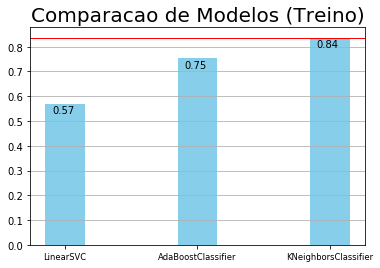

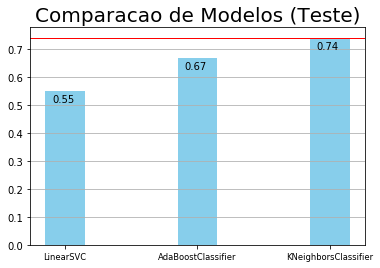

In [48]:
# verificando o desempenho após inserir mais dados no dataset
# CMIG4
dataset_verificacao_v2 = CMIG4_v2.copy()

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        dataset_verificacao_v2
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'IBOV', 'Dolar_PTAX', 'Selic']
                                        ,'Predict', 'Date', )

train_test_split_data_cmig4 = [X_train, X_test, y_train, y_test]

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)


KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


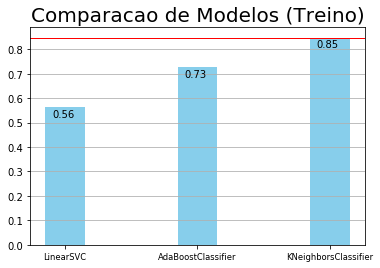

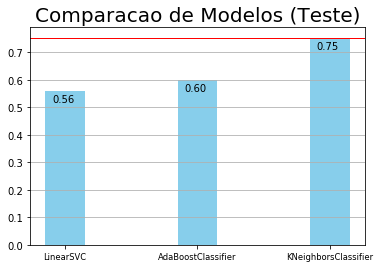

In [49]:
# verificando o desempenho após inserir mais dados no dataset
# ITUB4
dataset_verificacao_v2 = ITUB4_v2.copy()

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        dataset_verificacao_v2
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'IBOV', 'Dolar_PTAX', 'Selic']
                                        ,'Predict', 'Date', )

train_test_split_data_itub4 = [X_train, X_test, y_train, y_test]

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)


KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


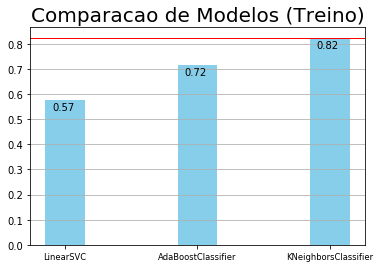

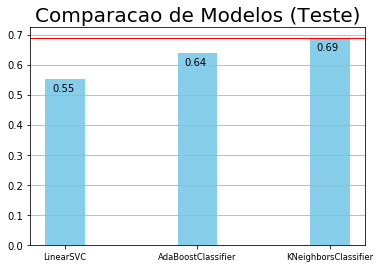

In [50]:
# verificando o desempenho após inserir mais dados no dataset
# MGLU3
dataset_verificacao_v2 = MGLU3_v2.copy()

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        dataset_verificacao_v2
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'IBOV', 'Dolar_PTAX', 'Selic']
                                        ,'Predict', 'Date', )

train_test_split_data_mglu3 = [X_train, X_test, y_train, y_test]

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)


KNeighborsClassifier trained.
LinearSVC trained.
AdaBoostClassifier trained.


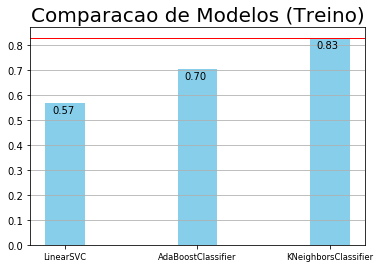

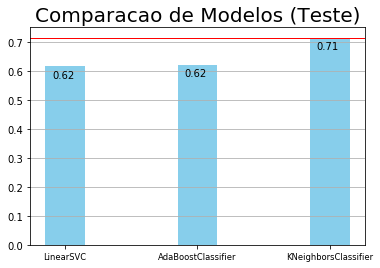

In [51]:
# verificando o desempenho após inserir mais dados no dataset
# PETR4
dataset_verificacao_v2 = PETR4_v2.copy()

# pre-processamento
X_train, X_test, y_train, y_test = smp.pre_processing_dataset(
                                        dataset_verificacao_v2
                                        , 5
                                        , ['Volume']
                                        , ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'IBOV', 'Dolar_PTAX', 'Selic']
                                        ,'Predict', 'Date', )

train_test_split_data_petr4 = [X_train, X_test, y_train, y_test]

# comparando modelos
compare_models_results = smp.compare_models( X_train, y_train, X_test, y_test)

# apresentando resultado da comparacao
smp.compare_models_visualization(compare_models_results)


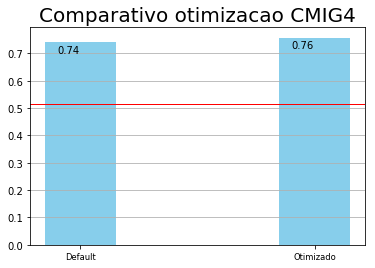

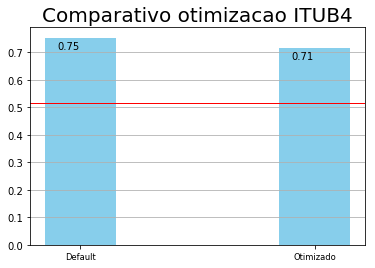

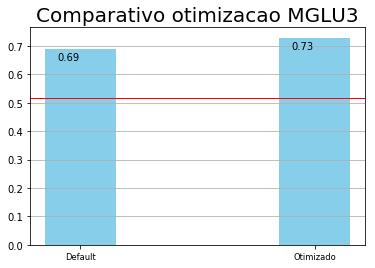

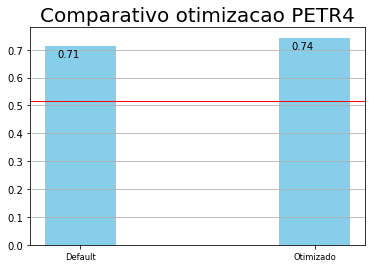

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='uniform')


In [57]:
# avaliar tuning do modelo
from sklearn.neighbors import KNeighborsClassifier

# naive_predictor_precision

clf = KNeighborsClassifier()
parameters = {'leaf_size': range(1, 60, 2), 'n_neighbors': range(1, 10), 'p': [1, 2]}


best_clf_params_cmig4, dados_otimizacao_cmig4 = smp.tuning_valuation(clf, parameters
                                             , train_test_split_data_cmig4[0]
                                             , train_test_split_data_cmig4[2]
                                             , train_test_split_data_cmig4[1]
                                             , train_test_split_data_cmig4[3]
                                             , False)

best_clf_params_itub4, dados_otimizacao_itub4 = smp.tuning_valuation(clf, parameters
                                             , train_test_split_data_itub4[0]
                                             , train_test_split_data_itub4[2]
                                             , train_test_split_data_itub4[1]
                                             , train_test_split_data_itub4[3]
                                             , False)

best_clf_params_mglu3, dados_otimizacao_mglu3 = smp.tuning_valuation(clf, parameters
                                             , train_test_split_data_mglu3[0]
                                             , train_test_split_data_mglu3[2]
                                             , train_test_split_data_mglu3[1]
                                             , train_test_split_data_mglu3[3]
                                             , False)

best_clf_params_petr4, dados_otimizacao_petr4 = smp.tuning_valuation(clf, parameters
                                             , train_test_split_data_petr4[0]
                                             , train_test_split_data_petr4[2]
                                             , train_test_split_data_petr4[1]
                                             , train_test_split_data_petr4[3]
                                             , False)

# apresentar grafico com o resultado da otimização
smp.tuning_visualization('CMIG4', dados_otimizacao_cmig4, naive_predictor_precision)
smp.tuning_visualization('ITUB4', dados_otimizacao_itub4, naive_predictor_precision)
smp.tuning_visualization('MGLU3', dados_otimizacao_mglu3, naive_predictor_precision)
smp.tuning_visualization('PETR4', dados_otimizacao_petr4, naive_predictor_precision)

print(best_clf_params_cmig4)
print(best_clf_params_itub4)
print(best_clf_params_mglu3)
print(best_clf_params_petr4)